In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.stats import bootstrap

In [2]:
true_mu = 3.14
true_std = 2.345

In [31]:
samples = [ np.random.normal(true_mu, true_std, 100) + np.random.normal(true_mu-1, 2*true_std, 100) for _ in range(100) ]

In [32]:
means, bootstrap_errors, standard_errors = [], [], []

events = np.unique(np.logspace(np.log10(2), np.log10(len(samples)), 20).astype(int))

for max_event in events:
    sample = np.concatenate(samples[:max_event])
    means.append(np.mean(sample))
    bootstrap_errors.append(bootstrap((sample,), np.mean).standard_error)
    standard_errors.append(np.std(sample)/np.sqrt(len(sample)))
    
means = np.array(means)
bootstrap_errors = np.array(bootstrap_errors)
standard_errors = np.array(standard_errors)

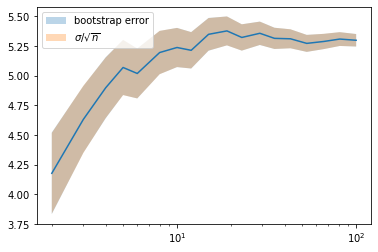

In [33]:
fig, ax = plt.subplots()

ax.plot(events, means)
ax.fill_between(events, means-bootstrap_errors, means+bootstrap_errors, alpha=0.3, label="bootstrap error")
ax.fill_between(events, means-standard_errors, means+standard_errors, alpha=0.3, label="$\\sigma / \\sqrt{{n}}$")
ax.set_xscale('log')
ax.legend()

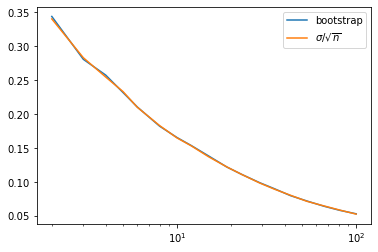

In [34]:
fig, ax = plt.subplots()

ax.plot(events, bootstrap_errors, label="bootstrap",)
ax.plot(events, standard_errors, label="$\\sigma / \\sqrt{{n}}$")
ax.set_xscale('log')
ax.legend()